# Coordinate Transformations in 2D

In lectures, we were introduced to the idea that graphics programming uses matrices to transform objects seen in a window to be correctly displayed in a viewport on the screen.

In code, efficiency is important. A *composite* transformation matrix can apply all the steps needed at the same time, reducing the number of operations. The composite transformation matrix is formed by multiplying the required steps (translation, rotation, scaling) and their matrices together. Due to our particular application and graphics pipeline, we use specific forms of matrices and post-multiply window coordinates to achieve the correct transformations. We were also introduced to the concept of homogenous coordinates for specific positions, in order to correctly apply the transformations.

In this notebook, we will put these calculations into practice, by performing the transformations practiced in class on specific objects and observing the effects.

In [9]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym

We will begin by creating an object that we need to transform.
One of the simplest objects to manipulate is a square: it will also easily allow us to explore the results of the transformations and compare with the original size and shape.

To create a square, we can create an array of $x$ and $y$-coordinates which are the vertices of this square. In order to draw lines between each array element and the next, we will append the array with the first value: this means that Python will just join every element of the array automatically when plotted:

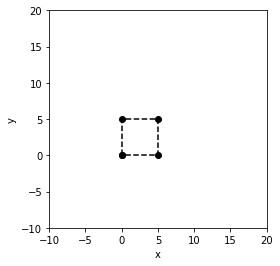

In [10]:
x_vals = np.array([0, 0, 5, 5])
y_vals = np.array([0, 5, 5, 0])
p = np.array([x_vals, y_vals])
lx=np.append(x_vals,x_vals[0]) #drawing the line between the last and first coord
ly=np.append(y_vals,y_vals[0])
plt.plot(lx, ly, 'ko', linestyle="--")
plt.ylim([-10,20])
plt.xlim([-10,20])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

## Homogenous coordinates


 

Our first task will be to organise the coordinates so that we can perform transformations. Our points are currently listed in two arrays, with the first containing the $x$-coordinates, and the second containing $y$-coords.

Typically when we work with coordinates and vectors or matrices, we need to have each *column* list a different dimension. We also need to extend each (2D) set of points to contain an extra dimension, a concept taught in the lectures as "homogenous coordinates''. 

Since we have an array each for $x$ and $y$, we'll first create a third array containing our extra homogenous coordinates. Then we'll stack our arrays on top of each other, to make a matrix which contains each coordinate dimension as a new row. Finally, we'll use the transpose command to switch rows and columns, so that we have our coordinate matrix formatted as we saw in lectures:

In [11]:
newrow = [1, 1, 1, 1]
hp = np.vstack([p, newrow])
print(hp.transpose())

[[0 0 1]
 [0 5 1]
 [5 5 1]
 [5 0 1]]


Note that each of the vertices of the object are listed as we saw in the lectures, with set of coordinates each inhabiting its own row.

## Rotation


In cases where rotation is needed, in the lectures we learned about the 2D rotation matrix, which takes the form seen in class (and in MAT102):

$$
R_{\theta_{z,{\underline{k}}}}=
	\begin{pmatrix}
	\cos(\theta_z) & \sin(\theta_z) & 0  \\
	-\sin(\theta_z) & \cos(\theta_z) & 0  \\
	0 & 0 & 1
	\end{pmatrix}.
$$

In this experiment, lets rotate by our square anticlockwise by $60^o$.

In [12]:
theta = 60
R_theta = np.matrix([[np.cos(math.radians(theta)), np.sin(math.radians(theta)), 0], 
                     [-np.sin(math.radians(theta)), np.cos(math.radians(theta)), 0], 
                     [0, 0, 1]]) 

We have to remember to PRE-MULTIPLY (due to the standard graphics pipeline approach). You may encounter different ways to apply transformation matrices in other web resources and textbooks, but they may use different pipelines or codes.

We take our matrix of coordinates (where each column is a different coordinate, i.e. using the transpose as shown above), and post-multiply our transformation matrix:

In [13]:
rp = hp.transpose()*R_theta

To plot this along side the original positions, we have to undo (or repeat) our transpose operation. To join the square up for plotting, we append the first coordinate to our arrays as the new last coordinate. We can now display the result of our rotation (in green), alongside the original unrotated square (black) in a plot:

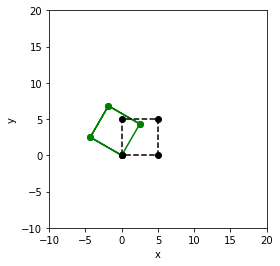

In [19]:
newrp = rp[:,0:2].transpose()
x_vals2 = [newrp[0,:]]
y_vals2 = [newrp[1,:]]
rlx=np.append(x_vals2,x_vals2[0])
rly=np.append(y_vals2,y_vals2[0])
plt.plot(rlx, rly, 'go', linestyle="-")
plt.plot(lx, ly, 'ko', linestyle="--")
plt.ylim([-10,20])
plt.xlim([-10,20])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

Note that the object has rotated *anti-clockwise*. If you require a clockwise rotation, the angle must be negative. Python can still handle negative angles. When it handles negative angles, it is really modifying the rotation matrix as you have learned in class:

$$
R_{-\theta_{z,{\underline{k}}}}=
	\begin{pmatrix}
	\cos(\theta_z) & -\sin(\theta_z) & 0  \\
	\sin(\theta_z) & \cos(\theta_z) & 0  \\
	0 & 0 & 1
	\end{pmatrix}.
$$

## Scaling


We learned in lectures to take the matrix of positions, and scale by the scaling matrix. In 2D, the scaling matrix looks like:

$$
S_{S_x,~S_y}=
\begin{pmatrix}
	S_x & 0 & 0 \\
	0 & S_y & 0 \\
	0 & 0 & 1
	\end{pmatrix}
$$


We'll stretch the object twice in $x$ and $2.5\times$ in $y$, which fixes $S_x$ and $S_y$:

$$
S_{S_x,~S_y}=
\begin{pmatrix}
	2 & 0 & 0 \\
	0 & 2.5 & 0 \\
	0 & 0 & 1
	\end{pmatrix}.
$$

This can be easily implemented in Python as a matrix:

In [20]:
Sxy = np.matrix([[2, 0, 0], 
                 [0, 2.5, 0], 
                 [0, 0, 1]]) 

We'll take our coordinates (in homogenous form), and multiply by this scaling matrix.



In [21]:
sp = hp.transpose()*Sxy

For plotting purposes, we'll undo our operations from earlier (Python makes it easier to plot things if fed a certain structure): we'll use the transpose command again to leave $x$ and $y$ coordinates in the first and second rows. Then we'll be able to plot the result and overlay the original square once more.

In [22]:
newp = sp[:,0:2].transpose()
x_vals1 = [newp[0,:]]
y_vals1 = [newp[1,:]]
slx=np.append(x_vals1,x_vals1[0])
sly=np.append(y_vals1,y_vals1[0])

Lets now plot the results, showing the scaled square in red and original square in black:

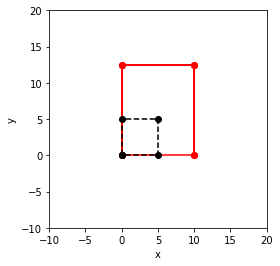

In [23]:
plt.plot(slx, sly, 'ro', linestyle="-")
plt.plot(lx, ly, 'ko', linestyle="--")
plt.ylim([-10,20])
plt.xlim([-10,20])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

You can see that the object has been doubled in size in $x$, while it is $2.5\times$ bigger in $y$. Note also that the positions whose coordinate elements equal zero are *unaffected* by the scaling: they remain at zero!

## Translation


The final common operation we'll deal with is a translation. In the lectures, translating an object by an amount $x_A$ in $x$ and $y_A$ in $y$ is achieved using the following matrix:

$$
T_{\underline{v}}=
	\begin{pmatrix}
	1 & 0 & 0 \\
	0 & 1 & 0 \\
	x_{A} & y_{A} & 1
	\end{pmatrix}
$$

Note that all other operations (rotation and scaling) for 2D positions can in principle be contained in a $2\times2$ matrix; a translation requires one more row and column than the number of dimensions we are working with. Hence to translate a 2D position, we require a $3\times3$ matrix. This is also why we need homogenous coordinates, so that we can couple translation with other transformations, filling in the missing dimensions as needed.

In this demo, we'll translate by $10$ in $x$ ($x_A=10$) and $8$ in $y$ ($y_A=8$).

In [24]:
Tv = np.matrix([[1, 0, 0], 
                [0, 1, 0], 
                [10, 8, 1]]) 

Once again we post-multiply our (transposed stacked arrays of) coordinates by this matrix:

In [25]:
Tp = hp.transpose()*Tv

Plotting the image will show how the original object has been translated in $x$ and $y$ (with translated image in turqoise):

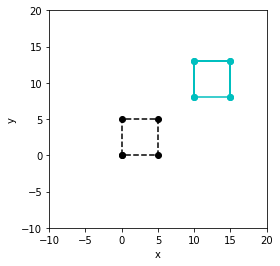

In [26]:
newtp = Tp[:,0:2].transpose()
x_vals3 = [newtp[0,:]]
y_vals3 = [newtp[1,:]]
tlx=np.append(x_vals3,x_vals3[0])
tly=np.append(y_vals3,y_vals3[0])
plt.plot(tlx, tly, 'co', linestyle="-")
plt.plot(lx, ly, 'ko', linestyle="--")
plt.ylim([-10,20])
plt.xlim([-10,20])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

As expected, the object has been translated by the expected amount in $x$ and $y$.

## Rotation and scaling at the origin

One thing mentioned in the lectures is that rotation and scaling must occur at the origin. Let's examine this more, with Python handling the mathematical operations.
We've already seen what happens when we rotate an object whose bottom left corner is already at the origin. **What happens if we rotate an object without first moving it to the origin?**

To explore this, we'll combine the rotation and translation operations we saw earlier, *but* explore what happens if we apply the transformations in two different orders: (i) translate then rotate; (ii) rotate then translate.


In [27]:
TRp = hp.transpose()*Tv*R_theta
TpR = hp.transpose()*R_theta*Tv

From the lectures we saw that the order of these operations is **not** interchangeable. Will our test also confirm this?



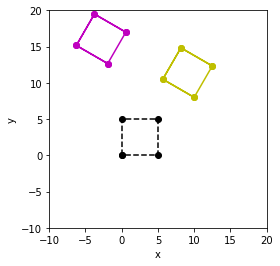

In [28]:
newtrp = TRp[:,0:2].transpose()
x_vals4 = [newtrp[0,:]]
y_vals4 = [newtrp[1,:]]
trlx=np.append(x_vals4,x_vals4[0])
trly=np.append(y_vals4,y_vals4[0])
newtpr = TpR[:,0:2].transpose()
x_vals5 = [newtpr[0,:]]
y_vals5 = [newtpr[1,:]]
rtlx=np.append(x_vals5,x_vals5[0])
rtly=np.append(y_vals5,y_vals5[0])
plt.plot(trlx, trly, 'mo', linestyle="-")
plt.plot(rtlx, rtly, 'yo', linestyle="-")
plt.plot(lx, ly, 'ko', linestyle="--")
plt.ylim([-10,20])
plt.xlim([-10,20])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

In the above example, the specific operations are the same: the only thing that has changed is the **order of operation**. 

*   With the magenta square, the translation acts first. This means the rotation also rotates the space in between the object and the origin.
*   With the yellow square, the object is rotated first, at the origin. The rotated object is then translated. Note that the coordinate which was originally at the origin lies at $(10,8)$: the rotation didnt affect this location, so it's new position effectively only shows evidence of translation.

**The order of operations in transformations is crucial.**

If a rotation or scaling operation is required, make sure that the object is moved to the origin first, then rotated, then scaled, then moved back to the required location. This is much easier than rotating the whole system, then attempting to find where the object has moved to! This is known as the **standard sequence** of matrix transformations.



## Over to You
These are very simple examples, designed to show off the mathematics you have been taught in class on specific objects. Once you are confident in the mathematical steps, we can use numerical codes like Python to perform the calculations for us. 

The other powerful aspect of these tools is that you can create **a single** matrix which contains all the information about several transformations. You can then apply this single matrix to any number of coordinates that must be transformed. You don't need to perform each step to each set of coordinates, and you can store the transformation in case you need to transform even more coordinates later, without resconstructing the matrices again.

Try implementing some of the transformations required by the tutorial calculations, and see if you can visually confirm your findings using Python. 